# General COVID-19 Tweet Dataset Cleaning And Semtiment Prediction

In [1]:
from google.colab import drive
drive.mount('/content/drive')


import os
os.chdir('/content/drive/My Drive/Disseration/covid19_tweets')
folder = os.path.join('/content/drive/My Drive/Disseration/covid19_tweets')
!ls

Mounted at /content/drive
'Copy of rnn_model.hdf5'   covid19_tweets.ipynb   model1.h5


## 1.Importing all the library

### 1.1 large installment

In [2]:
 !python3 -c "import nltk; nltk.download('all')"

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

In [3]:
pip install emojis

In [4]:
pip install dash


     |████████████████████████████████| 81kB 3.7MB/s 
     |████████████████████████████████| 1.0MB 19.1MB/s 
     |████████████████████████████████| 3.5MB 45.0MB/s 
     |████████████████████████████████| 92kB 9.4MB/s 
     |████████████████████████████████| 1.8MB 38.8MB/s 
     |████████████████████████████████| 358kB 34.4MB/s 
  Created wheel for dash: filename=dash-1.20.0-cp37-none-any.whl size=85834 sha256=5ff52f02626e94bf38ec3fb7489fca537a4f44ca6b6e484badda04c01f441e5c
  Stored in directory: /root/.cache/pip/wheels/e6/33/41/ce361d0d1da277d2350f815b10f2ab1e331592d93ef2b07e29
  Created wheel for dash-renderer: filename=dash_renderer-1.9.1-cp37-none-any.whl size=1014875 sha256=2a0dbfd77aa47d1ded671398eb49d8d57a743c346bdae6e314daaad24afd951f
  Stored in directory: /root/.cache/pip/wheels/03/a9/c5/dd5815c601b0ede164c223ffd7bafebde716ca57de06ef8aec
  Created wheel for dash-core-components: filename=dash_core_components-1.16.0-cp37-none-any.whl size=3540993 sha256=1a987aaf34b9bff6c4e21f

In [5]:
pip install jupyter_dash

### 1.2 Importing the libraries required

In [6]:
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import nltk 
import string
import re
%matplotlib inline
import emojis
from nltk.tokenize import TweetTokenizer 
# from nltk.corpus import stopwords          # module for stop words that come with NLTK
# from nltk.stem import PorterStemmer

import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Embedding, Dense, LSTM,SpatialDropout1D
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Visualisation imports
import plotly.express as px
import dash
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import io
from base64 import b64encode
import missingno as ms
import matplotlib.pyplot as plt
import plotly.express as px



### 1.3 importing the Dataset

In [7]:
df_covid19 = pd.read_csv('https://raw.githubusercontent.com/FabioPalliparambil98/COVID-19_General_Tweets/main/combined_generaltweets.csv')
df_covid19.head()

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags
0,Praveen38651118,loves other .....,NaN,313,326,83045,08/04/2018 20:49,24/03/2021 13:11,4,RT @bollybubble: #SalmanKhan gets his first ja...,"[{'text': 'SalmanKhan', 'indices': [17, 28]}, ..."
1,iamAatmanirbhar,"VK😍, MSD🔥,SK♥️\nJaiHind 🇮🇳. \nHar Har Mahadev!🚩🚩",NaN,542,1096,33247,20/06/2020 20:19,24/03/2021 13:10,4,RT @bollybubble: #SalmanKhan gets his first ja...,"[{'text': 'SalmanKhan', 'indices': [17, 28]}, ..."
2,beingsrbsumit07,My Jaan @BeingSalmanKhan 🦁#Bhaijaan❤️ #Fav👉\n#...,Sab Ke Dil me ❣️,1577,2835,63609,10/10/2017 13:39,24/03/2021 13:10,4,RT @bollybubble: #SalmanKhan gets his first ja...,"[{'text': 'SalmanKhan', 'indices': [17, 28]}, ..."
3,RadheKiEID,Biggest Salman Khan fan,NaN,1591,650,19726,28/12/2019 15:08,24/03/2021 13:09,4,RT @bollybubble: #SalmanKhan gets his first ja...,"[{'text': 'SalmanKhan', 'indices': [17, 28]}, ..."
4,bollybubble,Bollywood Bubble - Your One Stop Destination F...,"Mumbai, Maharashtra",439,131695,50653,22/10/2015 07:21,24/03/2021 13:09,4,#SalmanKhan gets his first jab of #Covid19 vac...,"[{'text': 'SalmanKhan', 'indices': [0, 11]}, {..."


## 2.Data Pre-Processing

### 2.1 Removing NaN

In [8]:
print('Display the NaN values in the DataSet')

df_covid19.isnull().sum()

Display the NaN values in the DataSet


username              0
acctdesc          12945
location          33450
following             0
followers             0
totaltweets           0
usercreatedts         0
tweetcreatedts        0
retweetcount          0
text                  0
hashtags              0
dtype: int64

In [9]:
print("Before the NaN value is removed")
print(df_covid19.shape)
print('')
df_covid19 = df_covid19.dropna()

print("After the NaN values is removed")
print(df_covid19.shape)

Before the NaN value is removed
(150387, 11)

After the NaN values is removed
(112807, 11)


In [10]:
print('result after removing the NaN in the DataSet')
df_covid19.isnull().sum()

result after removing the NaN in the DataSet


username          0
acctdesc          0
location          0
following         0
followers         0
totaltweets       0
usercreatedts     0
tweetcreatedts    0
retweetcount      0
text              0
hashtags          0
dtype: int64

### 2.2 Dropping Duplicates

In [11]:
print('before dropping duplicates')
print(df_covid19.shape,"\n")

df_covid19 = df_covid19.drop_duplicates()

# df_covid19.drop_duplicates(subset ="text", keep = False, inplace = True)

print('After dropping duplicates')
print(df_covid19.shape)

before dropping duplicates
(112807, 11) 

After dropping duplicates
(4728, 11)


### 2.3 Object to Datetime

In [12]:
df_covid19['tweetcreatedts'] = pd.to_datetime(df_covid19['tweetcreatedts'])
df_covid19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4728 entries, 2 to 150386
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   username        4728 non-null   object        
 1   acctdesc        4728 non-null   object        
 2   location        4728 non-null   object        
 3   following       4728 non-null   int64         
 4   followers       4728 non-null   int64         
 5   totaltweets     4728 non-null   int64         
 6   usercreatedts   4728 non-null   object        
 7   tweetcreatedts  4728 non-null   datetime64[ns]
 8   retweetcount    4728 non-null   int64         
 9   text            4728 non-null   object        
 10  hashtags        4728 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 443.2+ KB


### 2.4 resetting the index for pandas dataframe

In [13]:
# resetting the index available
df_covid19.reset_index(drop=True, inplace=True)

### 2.5 Extracting Day, Hour, Month and Date
- https://pythontic.com/datetime/datetime/weekday 

In [14]:
df_covid19['Month'] = df_covid19.tweetcreatedts.dt.month
df_covid19['Hour'] = df_covid19.tweetcreatedts.dt.hour
df_covid19['day_in_week'] = df_covid19.tweetcreatedts.dt.weekday
df_covid19['day'] = df_covid19.tweetcreatedts.dt.day

In [15]:
print('before changing numeric to characters')
print(df_covid19.day_in_week.unique())
print("\n")

df_covid19['day_in_week'].replace(0, 'Monday',inplace=True)
df_covid19['day_in_week'].replace(1, 'Tuesday',inplace=True)
df_covid19['day_in_week'].replace(2, 'Wednesday',inplace=True)
df_covid19['day_in_week'].replace(3, 'Thursday',inplace=True)
df_covid19['day_in_week'].replace(4, 'Friday',inplace=True)
df_covid19['day_in_week'].replace(5, 'Saturday',inplace=True)
df_covid19['day_in_week'].replace(6, 'Sunday',inplace=True)

print('After changing numeric to characters')
print(df_covid19.day_in_week.unique())

before changing numeric to characters
[2 1 0 6 5 4 3]


After changing numeric to characters
['Wednesday' 'Tuesday' 'Monday' 'Sunday' 'Saturday' 'Friday' 'Thursday']


## 3.Sentiment Analysis Data Preparation 

### 3.1 Cleaning the Text

In [16]:
def clean_data(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    # text = re.sub('[0-9]+', '', text)
    text = re.sub(r'^RT[\s]+', '', text)
    text = emojis.decode(text)
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'_', '', text)
    text = re.sub(r'[0-9]', '', text)
    text = re.sub('@[^\s]+', '', text)
    text = re.sub(r'[^\w\s]',' ', text)
    text = text.lower()
    return text



df_covid19['location'] = df_covid19['location'].apply(lambda x: clean_data(x))

df_covid19.head(1)



,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags,Month,Hour,day_in_week,day
0,beingsrbsumit07,My Jaan @BeingSalmanKhan 🦁#Bhaijaan❤️ #Fav👉\n#...,sab ke dil me heavyheartexclamation,1577,2835,63609,10/10/2017 13:39,2021-03-24 13:10:00,4,RT @bollybubble: #SalmanKhan gets his first ja...,"[{'text': 'SalmanKhan', 'indices': [17, 28]}, ...",3,13,Wednesday,24


In [17]:
df_covid19.text[3]

'RT @NphcdaNG: Military Officers displaying their Vaccination Cards after receiving 1st jab of the Astrazeneca #COVID19 Vaccine at 22 Armour…'

In [18]:
print('before Cleaning Text')
print(df_covid19.text[3])
print("")

df_covid19['text'] = df_covid19['text'].apply(lambda x: clean_data(x)) 

print('After Cleaning Text')
print(df_covid19.text[3])

before Cleaning Text
RT @NphcdaNG: Military Officers displaying their Vaccination Cards after receiving 1st jab of the Astrazeneca #COVID19 Vaccine at 22 Armour…

After Cleaning Text
nphcdang military officers displaying their vaccination cards after receiving st jab of the astrazeneca covid vaccine at  armour 


### 3.2 Words Lemmatizer 

In [19]:
wn = nltk.WordNetLemmatizer()

df_covid19['text'] = df_covid19['text'].apply(lambda x: wn.lemmatize(x))

### 3.4 Tokenizing the words 

In [20]:
maximum_words = 1000
maximum_length = 100

tokenizer = Tokenizer(num_words=maximum_words, split=' ')
tokenizer.fit_on_texts(df_covid19['text'].values)
X = tokenizer.texts_to_sequences(df_covid19['text'].values)

### 3.5 Padding the Tokenized sequence

In [21]:
X_padded = pad_sequences(X)

In [22]:
X_padded

array([[  0,   0,   0, ...,   3,   2,   7],
       [  0,   0,   0, ...,   3,   2,   7],
       [  0,   0,   0, ...,   2,   7,  12],
       ...,
       [  0,   0,   0, ...,  92, 107,  39],
       [  0,   0,   0, ..., 372,   2,  41],
       [  0,   0,   0, ...,  97,  54, 192]], dtype=int32)

### 3.6 Model Prediction

In [31]:
from keras.models import load_model
model = load_model('rnn_model.hdf5')

In [32]:
predictions = model.predict(X_padded)
predictions

array([[0.5265858 ],
       [0.5265858 ],
       [0.33666182],
       ...,
       [0.2737859 ],
       [0.87333333],
       [0.6568769 ]], dtype=float32)

In [33]:
results = []

for i in predictions:    
  predicted_classes = np.argmax(i)
  if predicted_classes < 0.5:
    results.append(predicted_classes)
  else:
    results.append(predicted_classes)
  predicted_classes

In [34]:
df_covid19['sentiment'] = results

In [35]:
df_covid19.head(5)

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags,Month,Hour,day_in_week,day,sentiment
0,beingsrbsumit07,My Jaan @BeingSalmanKhan 🦁#Bhaijaan❤️ #Fav👉\n#...,sab ke dil me heavyheartexclamation,1577,2835,63609,10/10/2017 13:39,2021-03-24 13:10:00,4,bollybubble salmankhan gets his first jab of c...,"[{'text': 'SalmanKhan', 'indices': [17, 28]}, ...",3,13,Wednesday,24,0
1,bollybubble,Bollywood Bubble - Your One Stop Destination F...,mumbai maharashtra,439,131695,50653,22/10/2015 07:21,2021-03-24 13:09:00,4,salmankhan gets his first jab of covid vaccine...,"[{'text': 'SalmanKhan', 'indices': [0, 11]}, {...",3,13,Wednesday,24,0
2,SulaiOdus,Always ready to learn. Ex-Commando. #Leadershi...,global,3073,18217,31991,22/06/2012 07:32,2021-03-24 13:05:00,5,nphcdang military officers displaying their va...,"[{'text': 'COVID19', 'indices': [110, 118]}]",3,13,Wednesday,24,0
3,magarya,"PRO with NYSC, I tweet and Re Tweet. I love in...",nextdays racesurvival,4931,3978,490263,20/05/2009 17:17,2021-03-24 13:03:00,5,nphcdang military officers displaying their va...,"[{'text': 'COVID19', 'indices': [110, 118]}]",3,13,Wednesday,24,0
4,ThisIsMansherry,#LastBorn of #LIBRA♎.\n#Simple.\n#Classic.\n@k...,here and there universe,2011,1581,55952,06/01/2019 20:00,2021-03-24 12:59:00,5,nphcdang military officers displaying their va...,"[{'text': 'COVID19', 'indices': [110, 118]}]",3,12,Wednesday,24,0


## 4.Visualisations

### 4.1 word cloud Visualisation

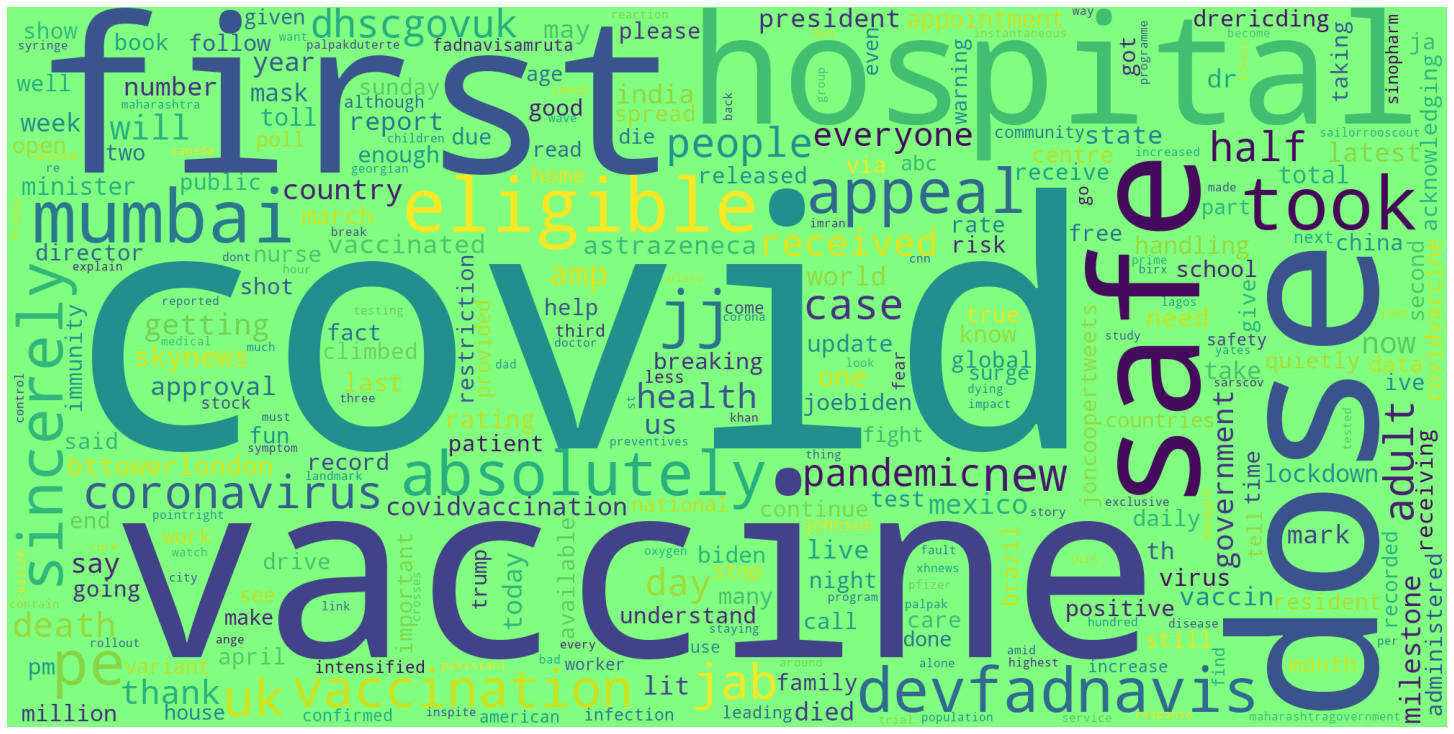

In [36]:
from wordcloud import WordCloud


wordcloud = WordCloud(background_color="#80ff80", max_words=300, width=2000, height=1000, collocations=False).generate(" ".join(df_covid19[df_covid19.sentiment == 0].text))

plt.figure(figsize = (20, 20), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

### 4.2 HashTag Visualisation

In [ ]:
def collectHashtag(x):
    hashtags = []    
    for i in x:        
        ht = re.findall(r"#(\w+)", i)        
        hashtags.append(ht)     
    return hashtags

In [ ]:
#Collect all the hashtags in positive and negative tweets
HT = collectHashtag(df_hash['text'])
#Nested List to Un-nested List
HT = sum(HT,[])

In [ ]:
corpus_positive = nltk.FreqDist(HT)

In [ ]:
d = pd.DataFrame({'Hashtag':list(corpus_positive.keys()),'Count':list(corpus_positive.values())})
d = d.nlargest(columns='Count',n=20)

In [ ]:
d


,Hashtag,Count
3,COVID19,7782
6,coronavirus,1357
1,Covid19,1323
60,covid19,555
29,pandemic,458
5,COVIDー19,448
267,lockdown,370
67,Coronavirus,366
61,COVID,322
356,Heightofhypocrisy,285


In [ ]:
import plotly.express as px
fig = px.bar(d, x='Hashtag', y='Count',color='Hashtag' ,text='Count')
fig.show()

### 4.4 Bar Chart
retween and hour visualisation


In [ ]:


days = df_covid19.day_in_week.unique()
buffer = io.StringIO()

html_bytes = buffer.getvalue().encode()
encoded = b64encode(html_bytes).decode()


colors = {
    'background': '#111111',
    'text': '#7FDBFF'
}

# Build App
app = JupyterDash(__name__)

app.layout = html.Div(style={'backgroundColor': colors['background']}, children=[
    html.H1(
        children='Bar Chart',
        style={
            'textAlign': 'center',
            'color': colors['text']
        }
    ),

    html.Div(children='Finding wether there is a relation between speed and the Accident Severity', style={
        'textAlign': 'center',
        'color': colors['text']
    }),
    
     html.Div(
        [
            dcc.Dropdown(
                id="dropdown",
                options=[{"label": x, "value": x} for x in days],
                value=days[0],
                clearable=False),
        ],
         style={'width': '25%',
               'display': 'inline-block', 'borderRadius':5,
        'padding':10, 'width':300}),

    dcc.Graph(
        id='graph'
    )
])

@app.callback(
    Output("graph", "figure"), 
    [Input("dropdown", "value")])

def update_bar_chart(days):
    mask = df_covid19["day_in_week"] == days
    fig = px.bar(df_covid19[mask], x="Hour", y="retweetcount", barmode="overlay")
    fig.update_layout(
        plot_bgcolor=colors['background'],
        paper_bgcolor=colors['background'],
        font_color=colors['text'],
        width=1800, height=800, bargap=0.05)
    
    return fig

app.run_server(debug=True)

Dash app running on:


<IPython.core.display.Javascript object>

In [ ]:
df_covid19.to_csv('general_covid.csv')